# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the dataset
url = 'https://github.com/Leonard-Simala/Datasets/raw/refs/heads/main/seattle-weather.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [ ]:
len(training_set)

1461

In [ ]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [ ]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [ ]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

Model Building and Training:

Creating the Model:
A sequential model is created using Keras, a popular deep learning library.
Adding LSTM Layers:
LSTM layers are added to the model to capture temporal dependencies in the data. Dropout layers are included to prevent overfitting, a common issue in machine learning where the model performs well on training data but poorly on unseen data.
Compiling the Model: The model is compiled with the 'adam' optimizer and 'mean_squared_error' loss function, suitable for regression tasks.
Training the Model: The model is trained using the fit method, providing training and validation data. The training process involves iteratively adjusting the model's weights to minimize the prediction error.

In [ ]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

In [ ]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7.9350 - val_loss: 10.6958
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 7.2893 - val_loss: 10.1007
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.5895 - val_loss: 9.9810
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.7308 - val_loss: 10.1198
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.2687 - val_loss: 10.3123
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.9895 - val_loss: 10.2651
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.0589 - val_loss: 10.2276
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.4830 - val_loss: 10.6942
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.3634 - val_loss: 12.3909
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.8415 - val_loss: 10.4548
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.8092 - val_loss: 10.5328
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
his = pd.DataFrame(history.history)

In [ ]:
his.head()

,loss,val_loss
0,7.930692,10.695763
1,7.569560,10.100668
2,7.691003,9.980968
3,7.874204,10.119826
4,7.198675,10.312275


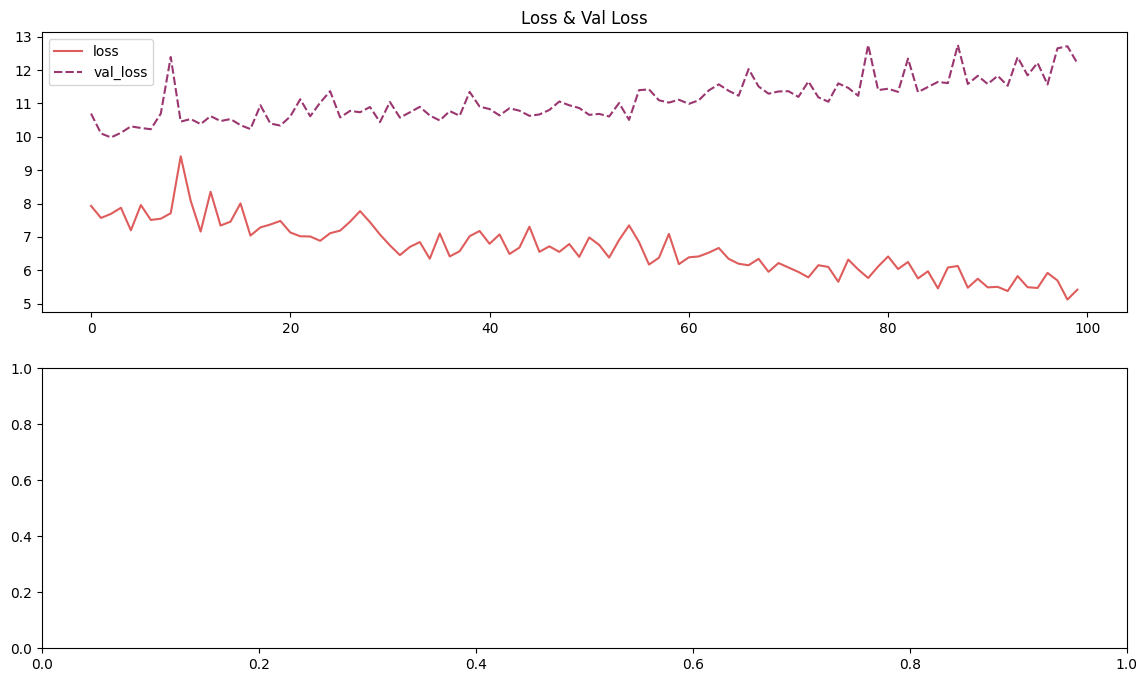

In [ ]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


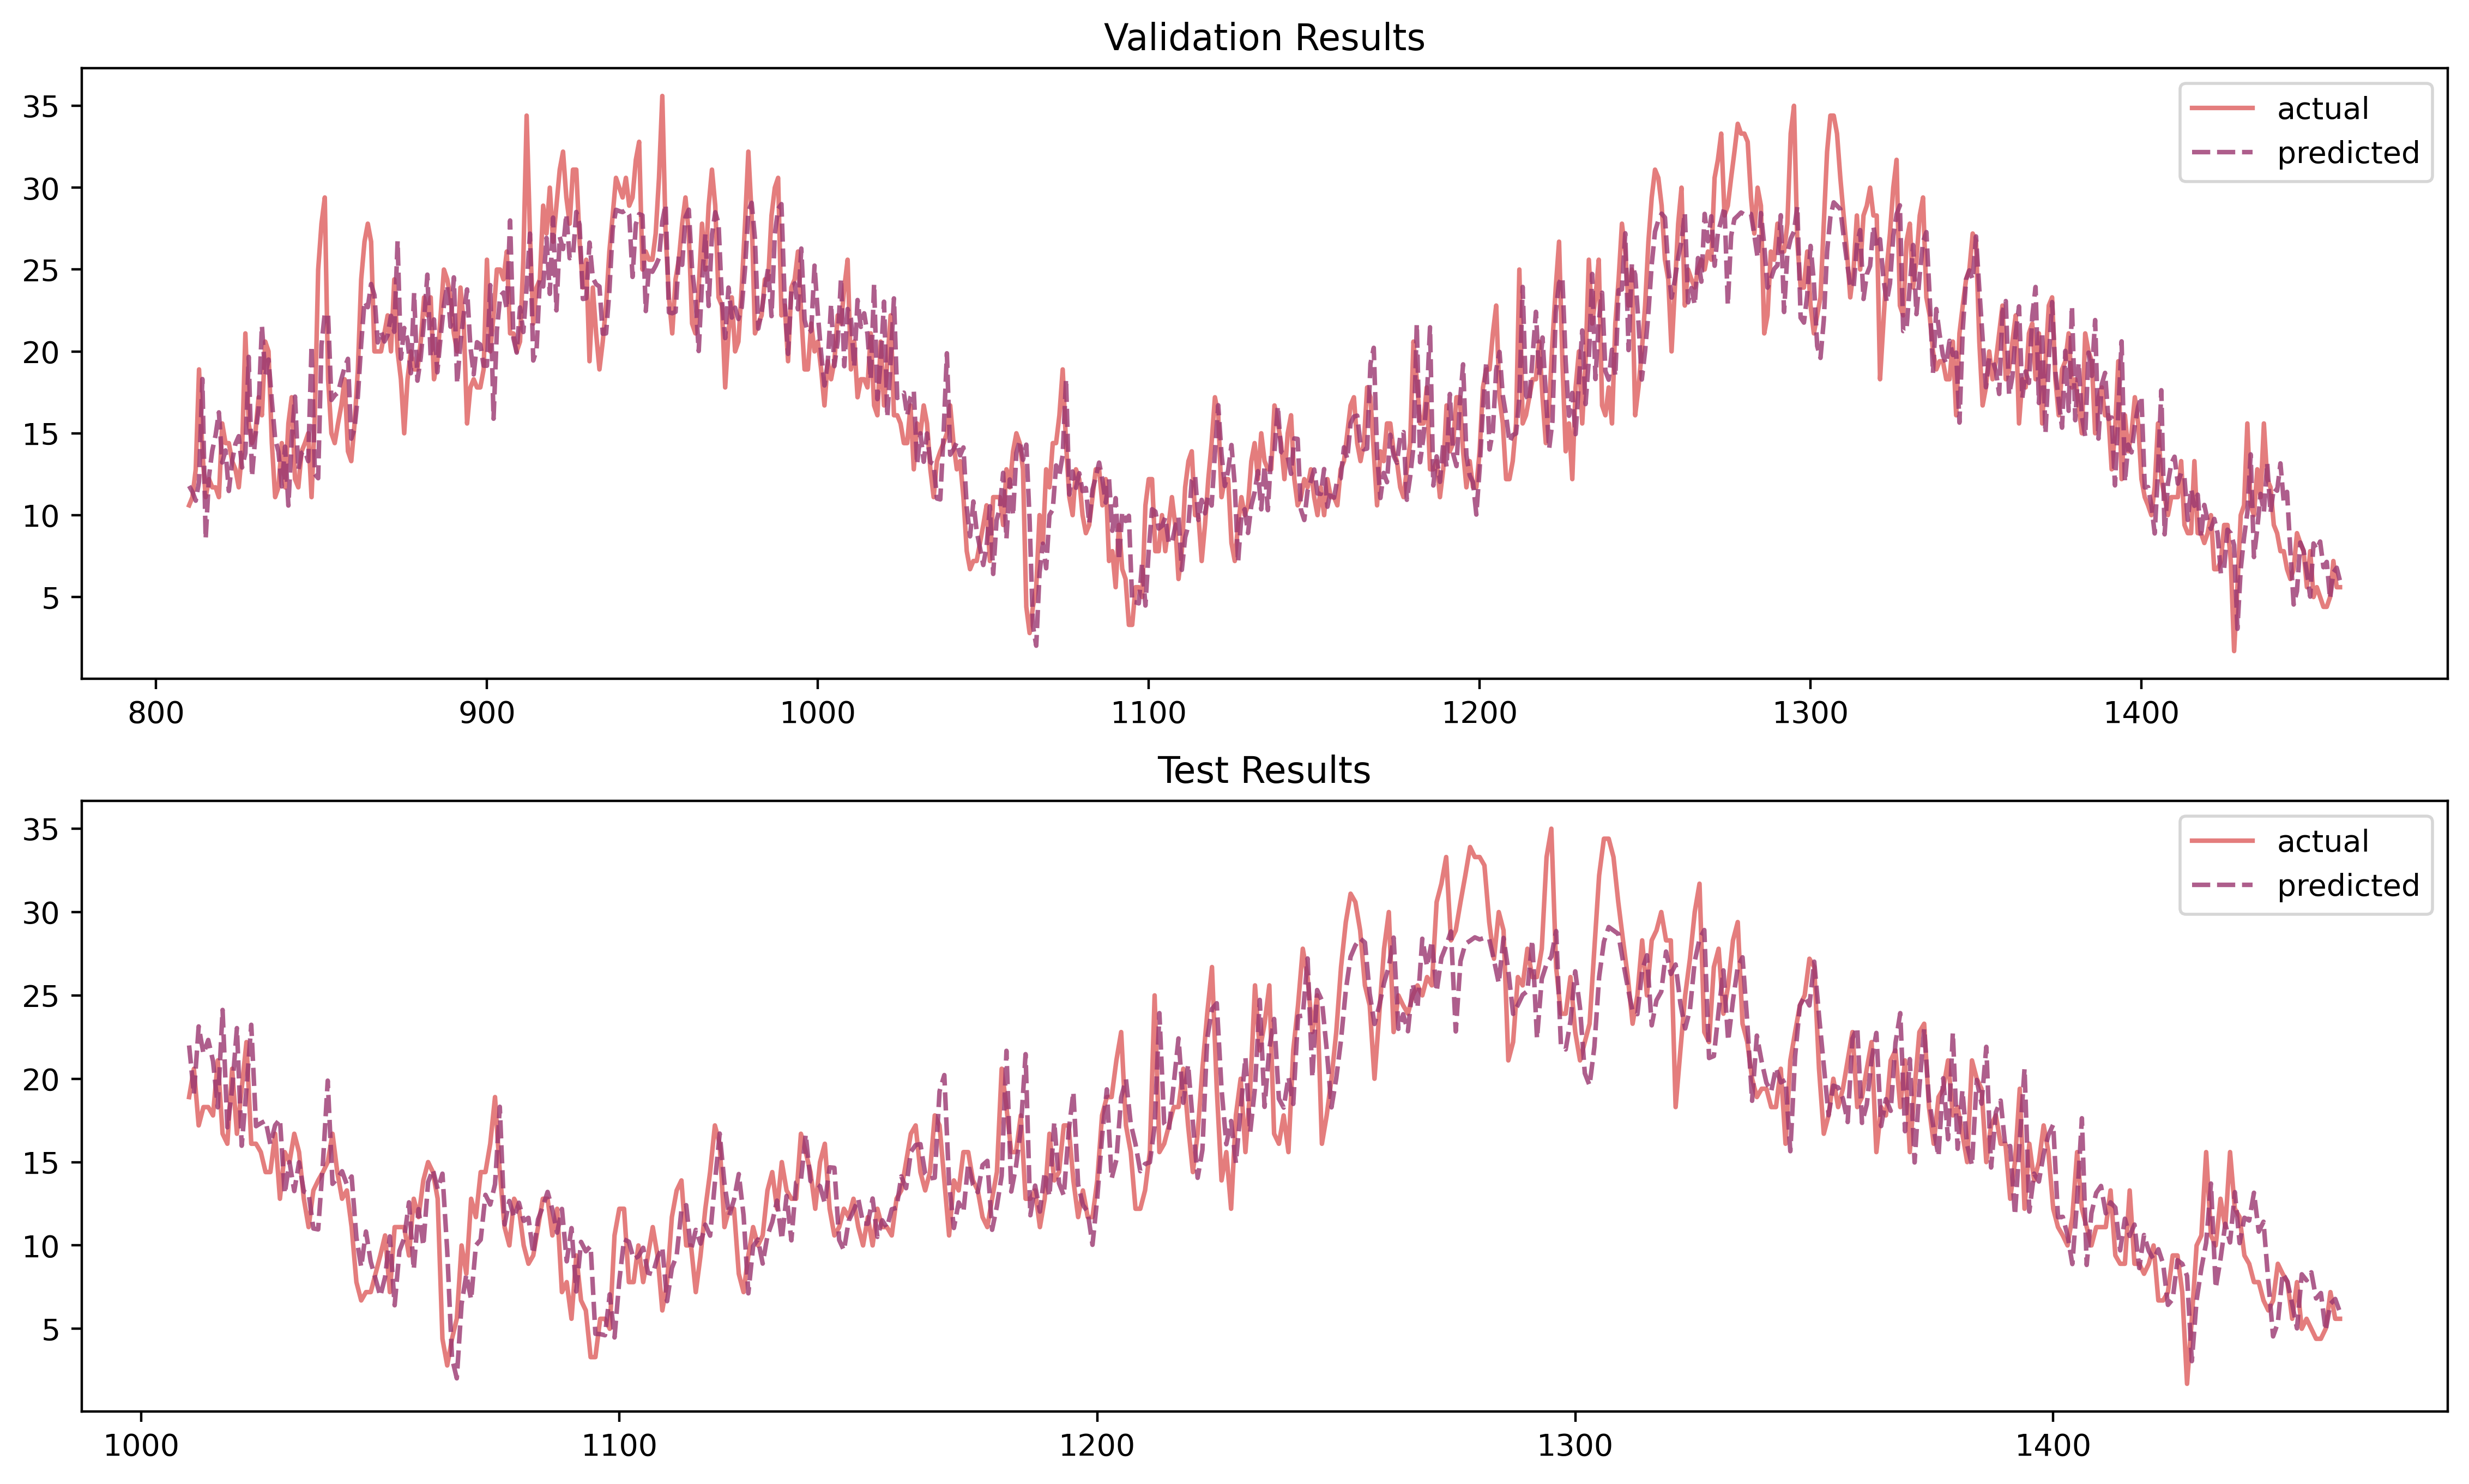

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);

###Comments

Time Series Forecasting:
My goal is to predict future weatherbased on past patterns.

Feature Engineering: I use the sliding window approach  for data transformation is a form of feature engineering, creating relevant input features from the raw data.

Model Selection: I use LSTMs as they are  well-suited for time series data due to their ability to learn long-term dependencies, making them a suitable choice for this task.

Model Evaluation: The code includes steps to evaluate the model's performance using validation and test sets, to assess its generalization ability.